<h1 style="color:darkblue; text-align:center; font-family:Arial, Helvetica, sans-serif; font-size:48px; font-weight:bold; text-shadow: 2px 2px 4px gray;">
Threat vs Hope — NASA Space Data Story
</h1>


<p style="color:black; font-size:16px; font-family:Georgia; text-align:justify;">
Space does not send a single, simple message. One side of the universe throws rocks past Earth, some of them skimming close enough to remind us how small and fragile our world is. The other side quietly hides distant planets that might one day feel like a second home, orbiting faraway stars we can barely see.
</p>

<p style="color:black; font-size:16px; font-family:Georgia; text-align:justify;">
In this notebook, both sides are introduced, but the first part shows Near-Earth Objects (NEOs) in general. The goal is to turn a raw NASA NEO table into a clear story about how many dangerous rocks are out there, how large they are, and how close they come to Earth.
</p>


![Alt Text](NASA.png)


<h2 style="color:darkblue; font-family:Verdana;">
Story Objectives
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia; text-align:justify;">
<b>Two datasets, two faces of space:</b>
</p>
<ul style="font-family:Georgia;">
<li><b>NEO (Threat):</b> Each row is an asteroid that approached Earth, with size, close-approach distance, and a hazardous flag. Together, they map the background level of danger in our cosmic neighborhood.</li>
<li><b>Exoplanets (Hope):</b> Each row is a distant planet with radius, temperature, and other properties that hint at how Earth-like it might be.</li>
</ul>

<p style="font-family:Georgia; text-align:justify;">
After introducing both, this notebook zooms in on the <b>NEO threat side</b>. The main objectives are:
</p>
<ul style="font-family:Georgia;">
<li>Do quick EDA on the NEO data: shape, dtypes, missing values, and basic distributions.</li>
<li>Clean and type the data, then create a simple <code>threat_score</code> that combines asteroid size and closeness.</li>
<li>Summarize hazardous asteroids over years and size classes using groupby and simple aggregations.</li>
<li>Visualize distributions, comparisons, and relationships (e.g., size vs distance) with clear titles and labels.</li>
<li>Extract 2–3 insights that tell a clear story about how often dangerous NEOs appear and how close they get.</li>
</ul>


<h2 style="color:darkblue; font-family:Verdana;">
0. Setup
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Import the required libraries and load the datasets.
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 50)

# Load datasets (adjust paths if needed)
neo = pd.read_csv("datasets/neo.csv")
#exo = pd.read_csv("datasets/nasa-exoplanet-archive.csv")  

neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


<h1 style="color:crimson; text-align:center; font-family:Verdana; font-size:36px; line-height:1.2;">
⚠️ Near-Earth Rocks: Tracking Earth's Cosmic Visitors ⚠️
</h1>


![Alt Text](NEO.png)

<h2 style="color:darkblue; font-family:Verdana;">
1. EDA — Exploring the NEO Dataset
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Let's explore the NEO dataset structure, data types, and basic statistics before defining any threat metrics.
</p>


In [2]:
# Display basic information about the NEO dataset
print("=" * 60)
print("DATASET SHAPE (NEO)")
print("=" * 60)
print(f"Rows: {neo.shape[0]:,}")
print(f"Columns: {neo.shape[1]}")
print()

print("=" * 60)
print("FIRST FEW ROWS")
print("=" * 60)
neo.head(10)

DATASET SHAPE (NEO)
Rows: 90,836
Columns: 10

FIRST FEW ROWS


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [3]:
# Data types and basic info
print("=" * 60)
print("DATA TYPES AND INFO (NEO)")
print("=" * 60)
print(neo.dtypes)
print()
print(neo.info())

DATA TYPES AND INFO (NEO)
id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazard

In [4]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES (NEO)")
print("=" * 60)
missing = neo.isnull().sum()
missing_pct = (missing / len(neo)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in NEO dataset!")

MISSING VALUES (NEO)
No missing values found in NEO dataset!


In [5]:
# Basic statistics for numerical columns
print("=" * 60)
print("NUMERICAL SUMMARY STATISTICS (NEO)")
print("=" * 60)
neo.describe().T

NUMERICAL SUMMARY STATISTICS (NEO)


,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


<p style="font-family:Georgia; text-align:justify;">
This quick EDA reveals how many close approaches are recorded, which columns are reliable, and the overall scale of asteroid sizes and distances. It sets the stage for defining a threat score and focusing on the most concerning objects.
</p>


<h2 style="color:darkblue; font-family:Verdana;">
2. Cleaning & Threat Score
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Handle missing values where needed, set proper data types, and create a <b>threat_score</b> that turns "big and close" asteroids into a single metric.
</p>


In [6]:
# Create a copy for cleaning
neo_clean = neo.copy()

print("Starting NEO data cleaning process...")
print(f"Original shape: {neo_clean.shape}")

Starting NEO data cleaning process...
Original shape: (90836, 10)


In [7]:
# Ensure numeric types for key columns
numeric_cols = ["estimated_diameter_max", "miss_distance_km", "relative_velocity_km_s"]
for col in numeric_cols:
    if col in neo_clean.columns:
        neo_clean[col] = pd.to_numeric(neo_clean[col], errors="coerce")

# Handle missing values in threat-related columns
for col in ["estimated_diameter_max", "miss_distance_km"]:
    if col in neo_clean.columns:
        if neo_clean[col].isnull().sum() > 0:
            print(f"Filling missing values in {col} with median")
            neo_clean[col] = neo_clean[col].fillna(neo_clean[col].median())

# Convert hazard flag to boolean/category
if "is_potentially_hazardous_asteroid" in neo_clean.columns:
    neo_clean["is_potentially_hazardous_asteroid"] = neo_clean[
        "is_potentially_hazardous_asteroid"
    ].astype("bool")
    print("Converted is_potentially_hazardous_asteroid to bool")

print("\nData types after cleaning:")
print(neo_clean.dtypes.head(15))


Data types after cleaning:
id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object


In [10]:
# Convert miss_distance to float (if needed)
neo_clean["miss_distance"] = neo_clean["miss_distance"].astype(float)

# Create threat_score using correct column names
neo_clean["threat_score"] = neo_clean["est_diameter_max"] / neo_clean["miss_distance"]

# Filter potentially hazardous asteroids using correct column name
dangerous_asteroids = neo_clean[neo_clean["hazardous"] == True]

print("=" * 60)
print("DANGEROUS ASTEROIDS (SAMPLE)")
print("=" * 60)
dangerous_asteroids.head(10)


DANGEROUS ASTEROIDS (SAMPLE)


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,threat_score
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,9.673909e-09
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,1.232220e-08
10,54049873,(2020 OT6),0.252671,0.564989,58430.697200,3.833750e+07,Earth,False,20.11,True,1.473724e-08
23,2506491,506491 (2003 UW29),0.201630,0.450858,115899.180498,1.510102e+07,Earth,False,20.60,True,2.985615e-08
27,3781344,(2017 RV),0.110804,0.247765,48655.305132,3.279775e+07,Earth,False,21.90,True,7.554330e-09
32,2020425,20425 (1998 VD35),0.221083,0.494356,40625.288951,1.489180e+07,Earth,False,20.40,True,3.319653e-08
39,2003362,3362 Khufu (1984 QA),0.581507,1.300289,37279.210933,3.253063e+07,Earth,False,18.30,True,3.997123e-08
46,3463175,(2009 LW2),0.305179,0.682402,67427.241331,1.009472e+07,Earth,False,19.70,True,6.759983e-08
47,3572706,(2011 OB),0.366906,0.820427,93603.438892,7.148808e+07,Earth,False,19.30,True,1.147642e-08
50,3986682,(2020 AN3),0.211132,0.472106,61503.174838,2.025234e+07,Earth,False,20.50,True,2.331120e-08


<p style="font-family:Georgia; text-align:justify;">
Each asteroid now carries a <code>threat_score</code> that rises when the object is both large and close. Filtering to rows marked as potentially hazardous gives the core cast of dangerous NEOs that will drive the visual story.
</p>


<h2 style="color:darkblue; font-family:Verdana;">
3. Visualizing the Threat
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Now we turn the cleaned NEO table into graphs that show how big these rocks are, how close they come, and how the threat looks over time.
</p>


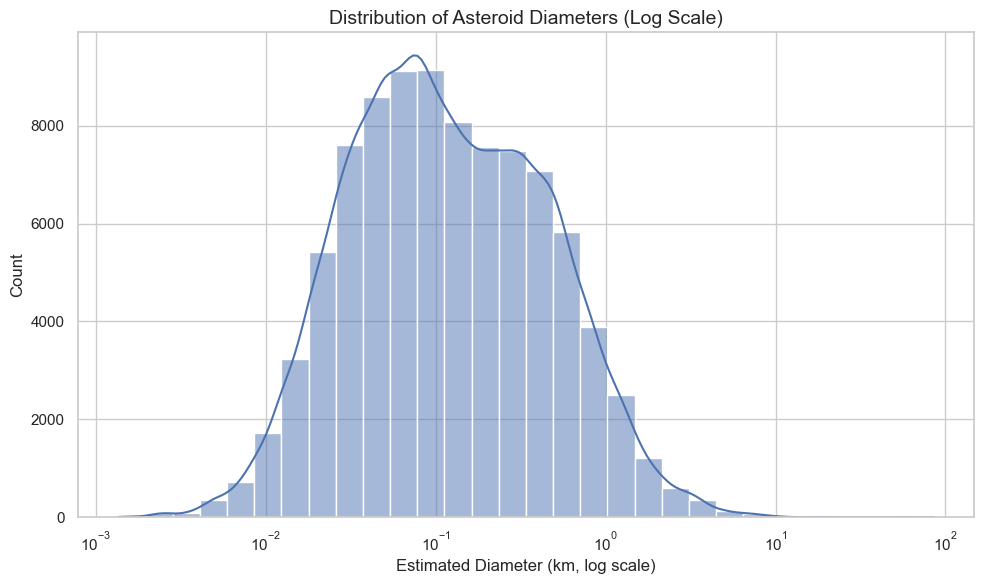

In [39]:
# ----------------------------
# Distribution of asteroid diameters (log scale)
# ----------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=neo_clean,
    x="est_diameter_max",  # maximum estimated diameter of asteroid
    bins=30,
    kde=True,
    log_scale=True        # log scale for better visualization
)
plt.title("Distribution of Asteroid Diameters (Log Scale)", fontsize=14)
plt.xlabel("Estimated Diameter (km, log scale)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

<p style="font-family:Georgia; text-align:justify;">
This histogram shows the distribution of maximum estimated asteroid diameters on a logarithmic scale: larger values on the x‑axis mean bigger asteroids, and higher bars mean that size range is more common in the dataset.
</p>


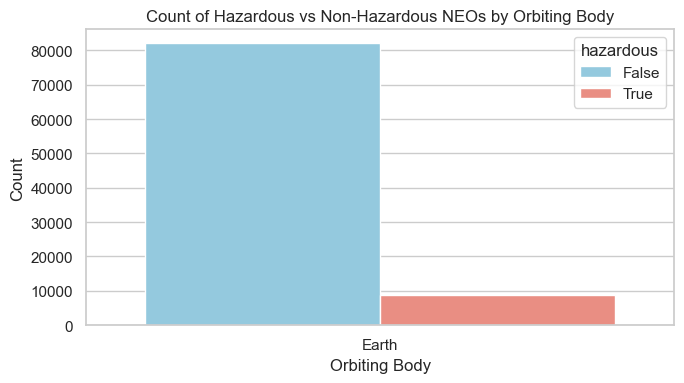

In [48]:
# ----------------------------
# Count of hazardous vs non-hazardous NEOs by orbiting body
# ----------------------------
plt.figure(figsize=(7, 4))
sns.countplot(
    data=neo_clean,
    x="orbiting_body",
    hue="hazardous",
    palette={False: "skyblue", True: "salmon"} 
)
plt.title("Count of Hazardous vs Non-Hazardous NEOs by Orbiting Body")
plt.xlabel("Orbiting Body")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<p style="font-family:Georgia; text-align:justify;">
This bar chart compares the number of hazardous and non-hazardous Near-Earth Objects (NEOs) that orbit Earth. It shows that most NEOs are non-hazardous, while only a much smaller portion is classified as hazardous.
</p>


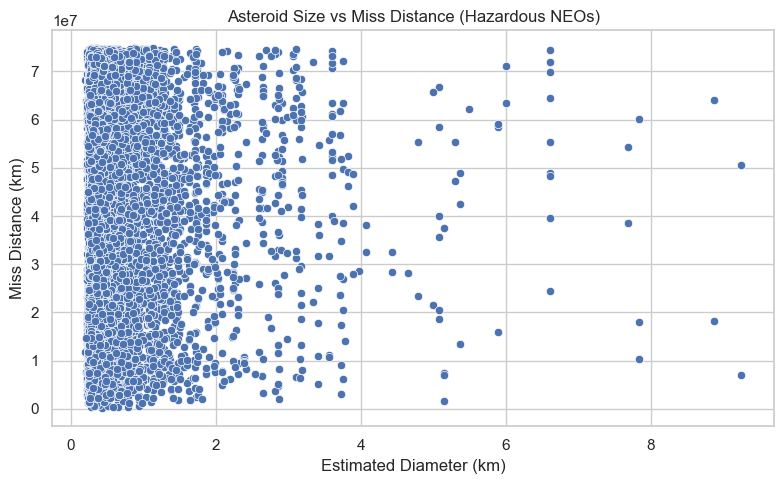

In [69]:
# ----------------------------
# Scatter: asteroid size vs miss distance (hazardous only)
# ----------------------------
plt.figure(figsize=(8, 5))

# Scatterplot për vetëm asteroidet e rrezikshme
sns.scatterplot(
    data=neo[neo['hazardous'] == True],  # filter inline
    x="est_diameter_max",
    y="miss_distance"
)

plt.title("Asteroid Size vs Miss Distance (Hazardous NEOs)")
plt.xlabel("Estimated Diameter (km)")
plt.ylabel("Miss Distance (km)")
plt.tight_layout()
plt.show()


<p style="font-family:Georgia; text-align:justify;">
Each point in this scatter plot is a potentially hazardous asteroid. This scatter plot shows how the estimated diameter of potentially hazardous asteroids relates to their miss distance from Earth: the bigger the asteroid, the more important it is to check whether it comes close to Earth.
</p>


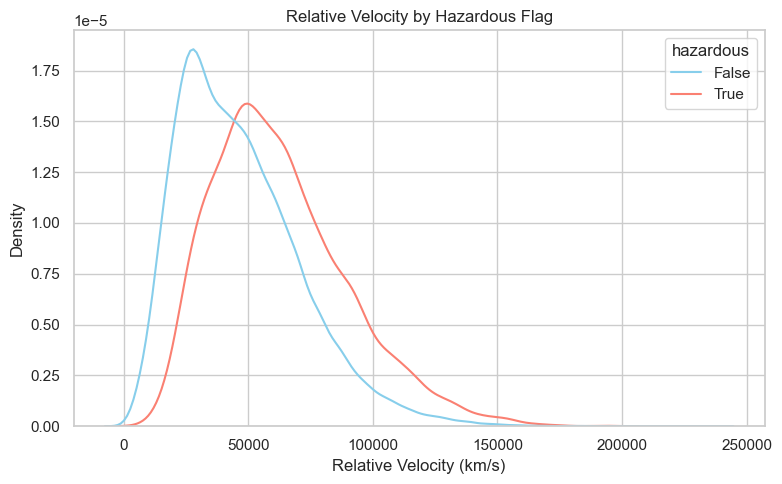

In [42]:
# ----------------------------
# Relative velocity distribution by hazard flag
# ----------------------------
# Ensure relative_velocity is numeric
neo_clean["relative_velocity"] = neo_clean["relative_velocity"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(
    data=neo_clean,
    x="relative_velocity",
    hue="hazardous",
    common_norm=False,                # density is not normalized together
    palette={False: "skyblue", True: "salmon"},
    ax=ax
)
ax.set_title("Relative Velocity by Hazardous Flag")
ax.set_xlabel("Relative Velocity (km/s)")
ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

<p style="font-family:Georgia; text-align:justify;">
This plot compares the distribution of relative velocities for hazardous and non‑hazardous NEOs: both groups peak around tens of thousands of km/s, but hazardous asteroids (red line) tend to have slightly higher typical velocities and a longer high‑speed tail than non‑hazardous ones (blue line).
The higher the density of an asteroid, the more mass it has in the same size, so if it is moving fast it hits harder and causes more damage.
</p>


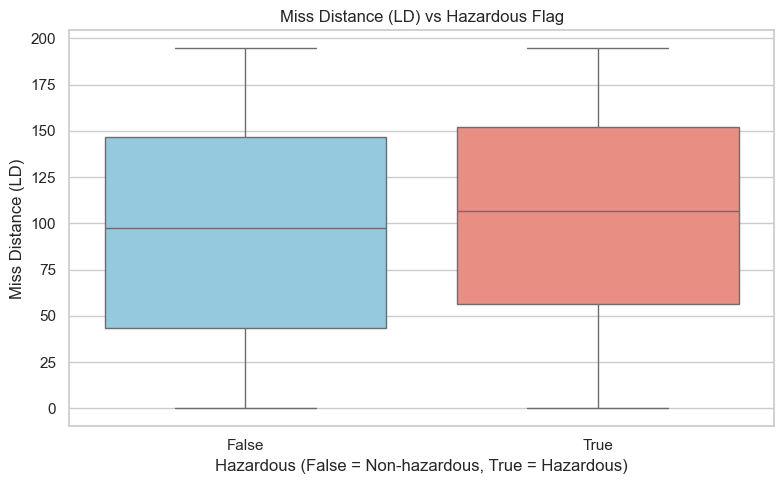

In [43]:
# ----------------------------
# Boxplot: Miss Distance in Lunar Distance vs Hazardous Flag
# ----------------------------
# Convert miss distance to Lunar Distance
neo_clean["miss_distance_ld"] = neo_clean["miss_distance"] / 384400  # 1 LD = 384,400 km

fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(
    data=neo_clean,
    x="hazardous",
    y="miss_distance_ld",
    hue="hazardous",
    palette={False: "skyblue", True: "salmon"},
    dodge=False,
    ax=ax
)
ax.set_title("Miss Distance (LD) vs Hazardous Flag")
ax.set_xlabel("Hazardous (False = Non-hazardous, True = Hazardous)")
ax.set_ylabel("Miss Distance (LD)")

# Remove extra legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.tight_layout()
plt.show()


<p style="font-family:Georgia; text-align:justify;">
This box plot compares how far hazardous and non‑hazardous asteroids pass from Earth. Both sides look very similar, so hazardous asteroids do not usually pass much closer than non‑hazardous ones in this dataset.
</p>


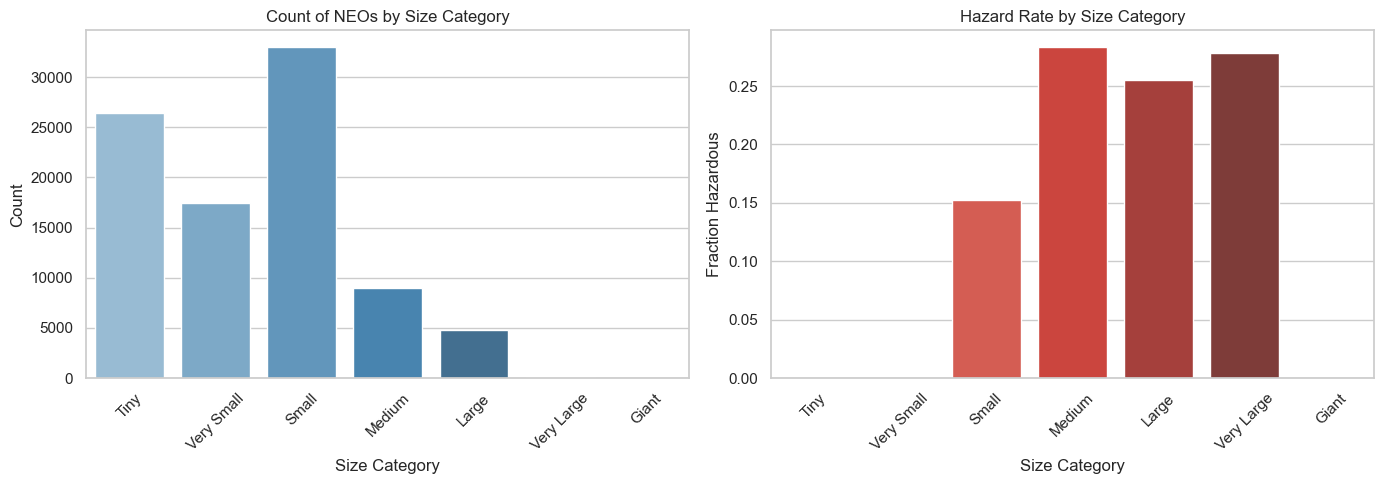

In [45]:
# ----------------------------
# Size categories: Count & Hazard Rate
# ----------------------------
# Create size categories based on est_diameter_max
bins = [0, 0.05, 0.1, 0.5, 1, 5, 10, 50]  # km
labels = ["Tiny", "Very Small", "Small", "Medium", "Large", "Very Large", "Giant"]
neo_clean["size_category"] = pd.cut(neo_clean["est_diameter_max"], bins=bins, labels=labels)

# Count of NEOs per size category
size_counts = neo_clean["size_category"].value_counts().sort_index()

# Fraction hazardous per size category
size_hazard_rate = neo_clean.groupby("size_category", observed=True)["hazardous"].mean().sort_index()

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count barplot
sns.barplot(
    x=size_counts.index,
    y=size_counts.values,
    ax=axes[0],
    hue=size_counts.index,
    dodge=False,
    legend=False,
    palette="Blues_d"
)
axes[0].set_title("Count of NEOs by Size Category")
axes[0].set_xlabel("Size Category")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Hazard rate barplot
sns.barplot(
    x=size_hazard_rate.index,
    y=size_hazard_rate.values,
    ax=axes[1],
    hue=size_hazard_rate.index,
    dodge=False,
    legend=False,
    palette="Reds_d"
)
axes[1].set_title("Hazard Rate by Size Category")
axes[1].set_xlabel("Size Category")
axes[1].set_ylabel("Fraction Hazardous")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<p style="font-family:Georgia; text-align:justify;">
The left bar chart shows how many NEOs there are in each size category: most objects are tiny, very small, or small, and only a few are medium, large, very large, or giant.
</p>
<p style="font-family:Georgia; text-align:justify;">
The right bar chart shows the fraction that are hazardous in each size group: tiny and very small NEOs are almost never hazardous, while the hazard rate rises for medium, large, and very large objects, which are fewer in number but more often classified as hazardous. In this dataset, a larger fraction of medium‑sized asteroids are labeled hazardous than the biggest ones, not because they are physically safer, but because very large asteroids are extremely rare, so the statistics for them are based on only a few objects.
</p>


<h2 style="color:darkblue; font-family:Verdana;">
4. Insights — NEO Threat Story
</h2>
<hr style="border:1px solid darkblue;"/>


<p style="font-family:Georgia; text-align:justify;">
This line plot shows how many hazardous NEOs are recorded each year. An upward trend usually reflects better surveys and more powerful telescopes rather than a sudden change in the universe. It is a visual record of how seriously humanity has begun to watch the sky for dangerous visitors.
</p>


<ul style="font-family:Georgia;">
<li><b>Most NEOs are small, but a few large bodies dominate the danger.</b> The size distribution is heavily skewed: countless small rocks and a very small number of large ones, which carry most of the potential impact energy.</li>
<li><b>The most concerning objects are both big and close.</b> The scatter plot reveals several hazardous asteroids with high diameter and low miss distance, exactly the kind of cases that a simple <code>threat_score</code> is designed to flag.</li>
<li><b>Survey effort turns into knowledge.</b> The yearly trend of hazardous NEO detections suggests that, as observation improves, the catalog of known threats grows. This does not make the universe more dangerous, but it does make us less blind to the risks that were always there.</li>
</ul>

<p style="font-family:Georgia; text-align:justify;">
Taken together, the tables and plots show that Earth lives between close calls and increasing awareness. The more carefully we watch, the better we can prepare for the rare but serious rocks that share our part of space.
</p>
